### r/dataisbeautiful - Battle 2019-06  
    https://www.reddit.com/r/dataisbeautiful/comments/bwocis/battle_dataviz_battle_for_the_month_of_june_2019/

### World Happines Report  
    data - https://www.kaggle.com/henosergoyan/happiness/data
    dataset info - https://www.kaggle.com/unsdsn/world-happiness

Original field names from Kaggle dataset were changed in excel as bellow:

        Happiness.Rank - Happiness Rank
        Happiness.Score - Happiness Score
        Whisker.low - Whisker low
        Whisker.high - Whisker high
        Economy..GDP.per.Capita. - Economy (GDP per Capita)
        Health..Life.Expectancy. - Health (Life Expectancy)
        Trust..Government.Corruption - Trust - Government Corruption
        Dystopia.Residual - Dystopia Residual

In [1]:
import geopandas
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
df = pd.read_csv('2017.csv')
df.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust - Government Corruption,Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


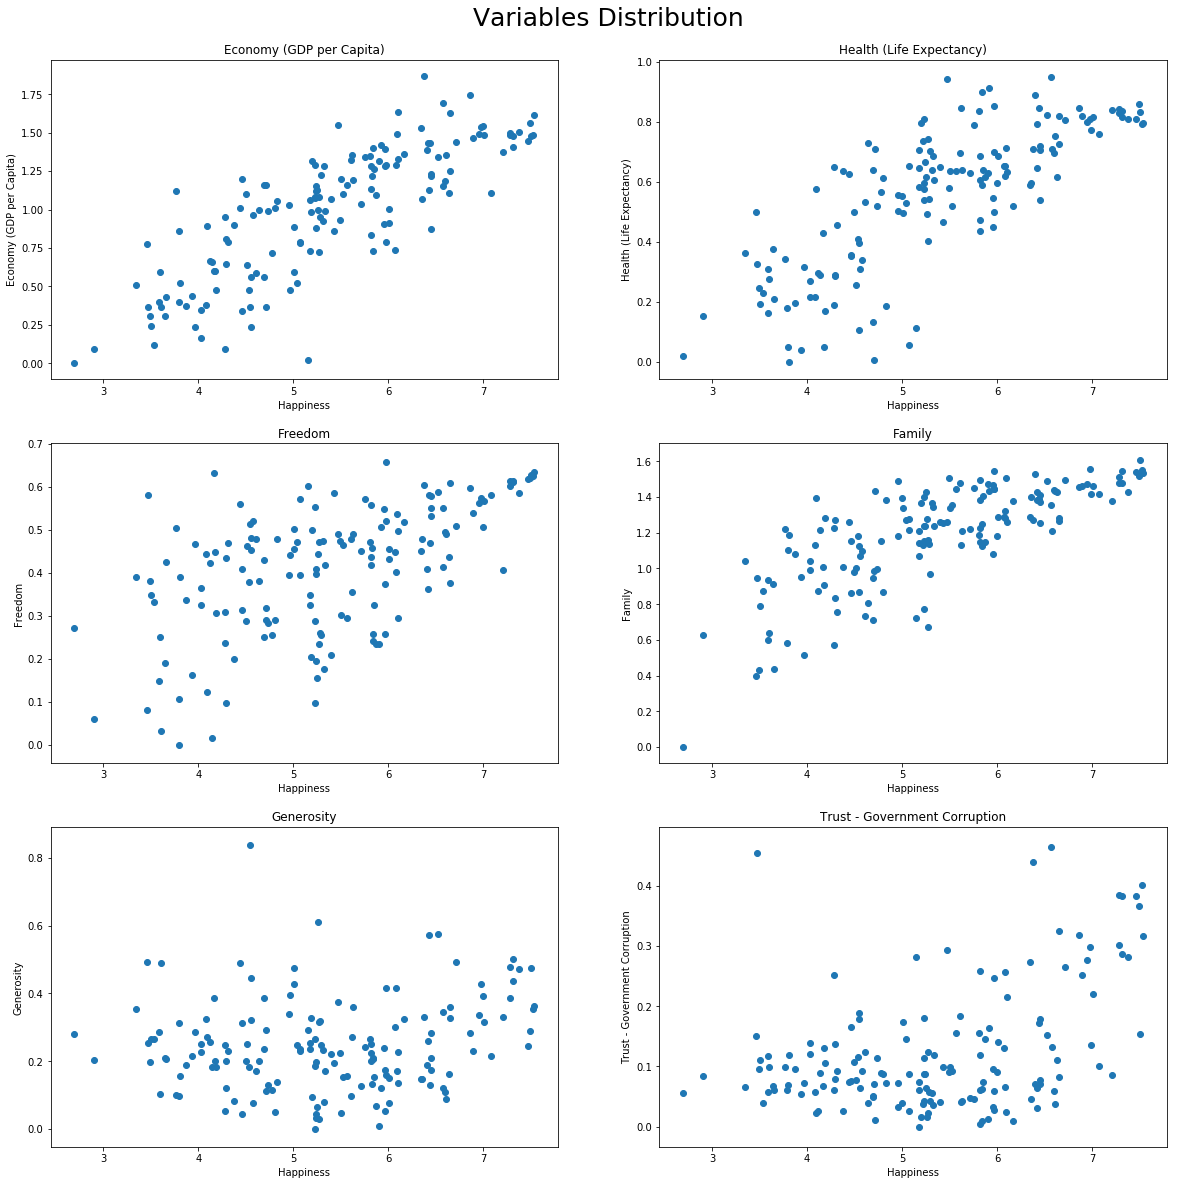

In [3]:
field_list = ['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 
              'Family', 'Generosity', 'Trust - Government Corruption']
sub_idx = 321

fig, ax = plt.subplots(1, figsize=(20, 20))
plt.title('Variables Distribution\n', fontsize='25')

for i in field_list:
    ax1 = fig.add_subplot(sub_idx)
    plt.scatter(df['Happiness Score'],df[i])
    plt.xlabel('Happiness')
    plt.ylabel(i)
    plt.title(i)
    sub_idx += 1

ax.axis('off')
plt.savefig('distributions' + '.png')

In [4]:
# calculate correlation for the variables
c = df[['Happiness Score','Economy (GDP per Capita)', 'Health (Life Expectancy)','Family', 'Freedom', 
         'Trust - Government Corruption','Generosity']]
corr = c.corr(method='pearson')

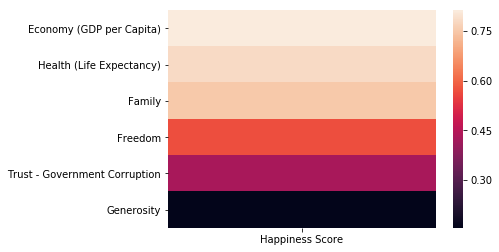

In [20]:
# correlation of the variables with the overall score
happiness_corr = sb.heatmap(corr.iloc[1:,:1])
fig = happiness_corr.get_figure()
fig.savefig('happiness_correlation.png', bbox_inches="tight")

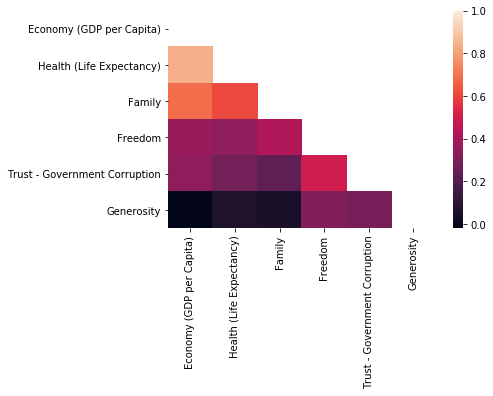

In [19]:
# correlation of the variables between themselfs
mask = np.zeros_like(corr.iloc[1:,1:])
mask[np.triu_indices_from(mask)] = 1
variables_corr = sb.heatmap(corr.iloc[1:,1:], mask = mask)
fig = variables_corr.get_figure()
fig.savefig('variables_correlation.png', bbox_inches='tight')

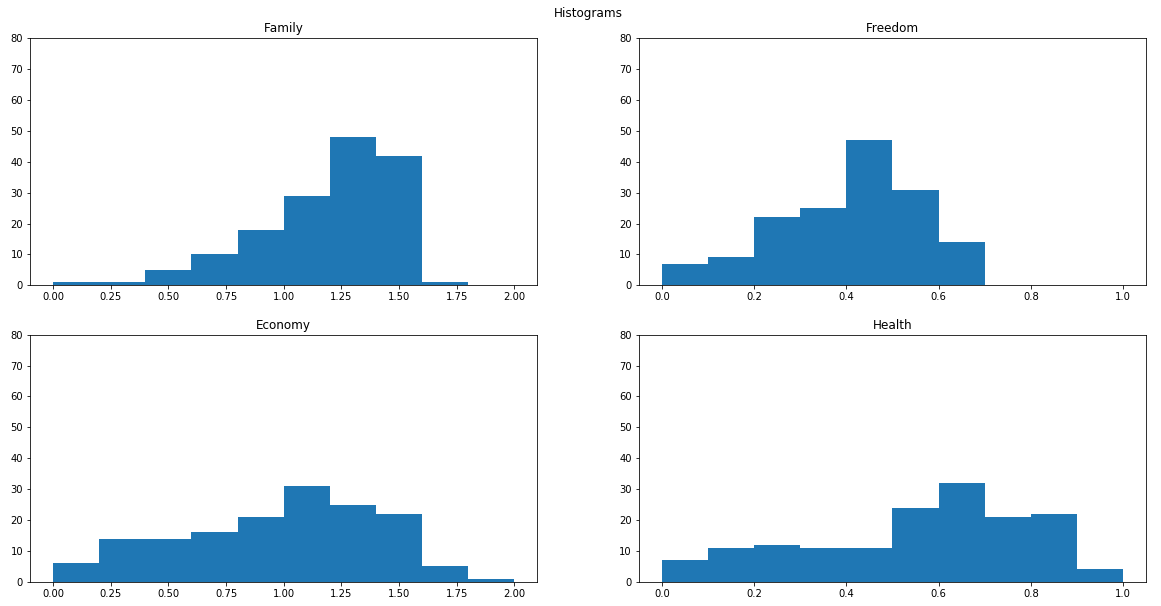

In [8]:
fig, ax = plt.subplots(1, figsize=(20, 10))
plt.title('Histograms\n')

ax1 = fig.add_subplot(221)
plt.hist(df['Family'], range=(0,2))
plt.ylim(0,80)
plt.title('Family')

ax1 = fig.add_subplot(222)
plt.hist(df['Freedom'], range=(0,1))
plt.ylim(0,80)
plt.title('Freedom')

ax1 = fig.add_subplot(223)
plt.hist(df['Economy (GDP per Capita)'], range=(0,2))
plt.ylim(0,80)
plt.title('Economy')

ax1 = fig.add_subplot(224)
plt.hist(df['Health (Life Expectancy)'], range=(0,1))
plt.ylim(0,80)
plt.title('Health')

ax.axis('off')
plt.savefig('histograms' + '.png')

### Correlation
Economy and Health were the most related to the overall score, followed by Family and Freedom, while Trust and Generosity were the least related.
I decided to keep Economy and Health for the visualization and remove Trust and Generosity.

#### Family and Freedom
Family had a strong relation with the happiness score and also with Economy and Health, but it's distribution is left-skewed and had most of it's values around 1~1.5 while Freedom was around 0.3~0.5, this stronger correlation can be explained by the way the Happiness score is calculate which is simply a sum of all the variables. Therefore a high score in Family will mean more than in Freedom to the Happiness score.
#### Selected Variables
    Economy | Health | Freedom

In [9]:
# Check mismatched names
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#print('in whr and not in map:')
#for name in df['name']:
#    if str(name) not in world['name'].values:
#        print(name)   
#print('\nin map and not in whr:')
#for name in world['name']:
#    if str(name) not in df['name'].values:
#        print(name)

In [10]:
whr_names = {'Palestinian Territories':'Palestine',
            'Ivory Coast':"Côte d'Ivoire", 
            'Bosnia and Herzegovina': 'Bosnia and Herz.',
            'Congo (Kinshasa)' : 'Dem. Rep. Congo',
            'Congo (Brazzaville)' : 'Congo',
            'Czech Republic' : 'Czech Rep.',
            'Central African Republic' : 'Central African Rep.',
            'Dominican Republic' : 'Dominican Rep.',
            'Somaliland region' : 'Somalia',
            'South Sudan' : 'S. Sudan',
            'North Cyprus' : 'N. Cyprus',
            'South Korea' : 'Korea'}

for name, clean_name in whr_names.items():
    df['Country'].loc[df.Country == name] = clean_name

C:\Users\thiag\.conda\envs\Training\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
def plot_map(field, vmin, vmax):
    # load maps and remove antarctic
    df_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    df_map = df_map[~df_map.name.isin(["Antarctica", "Fr. S. Antarctic Lands"])]
    
    # build a dataframe with the selected field
    df_item = df.filter(items=['Country',field]).copy()
    df_map = df_map.merge(df_item, how='left',left_on = 'name', right_on = 'Country')

    # set figure, axis and bg color
    fig, ax = plt.subplots(1,1,figsize=(40,20))
    fig.patch.set_facecolor('#85C1E9')

    # plot a background map
    df_map.plot(ax=ax, color='grey', alpha=0.3, edgecolor='0.2')

    # drop not listed countries and plot colormap
    df_map.dropna(inplace=True)
    df_map.plot(column=field, cmap='RdYlGn', ax=ax, vmin=vmin, vmax=vmax)
    # title
    plt.title(field, fontsize='38')

    # set an axis for the color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.05)
    # color bar
    sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.tick_params(labelsize=18)

    # hide map axis
    ax.axis('off')
    # save plot as pic 
    plt.savefig(field + '.png', facecolor=fig.get_facecolor(), edgecolor='none')

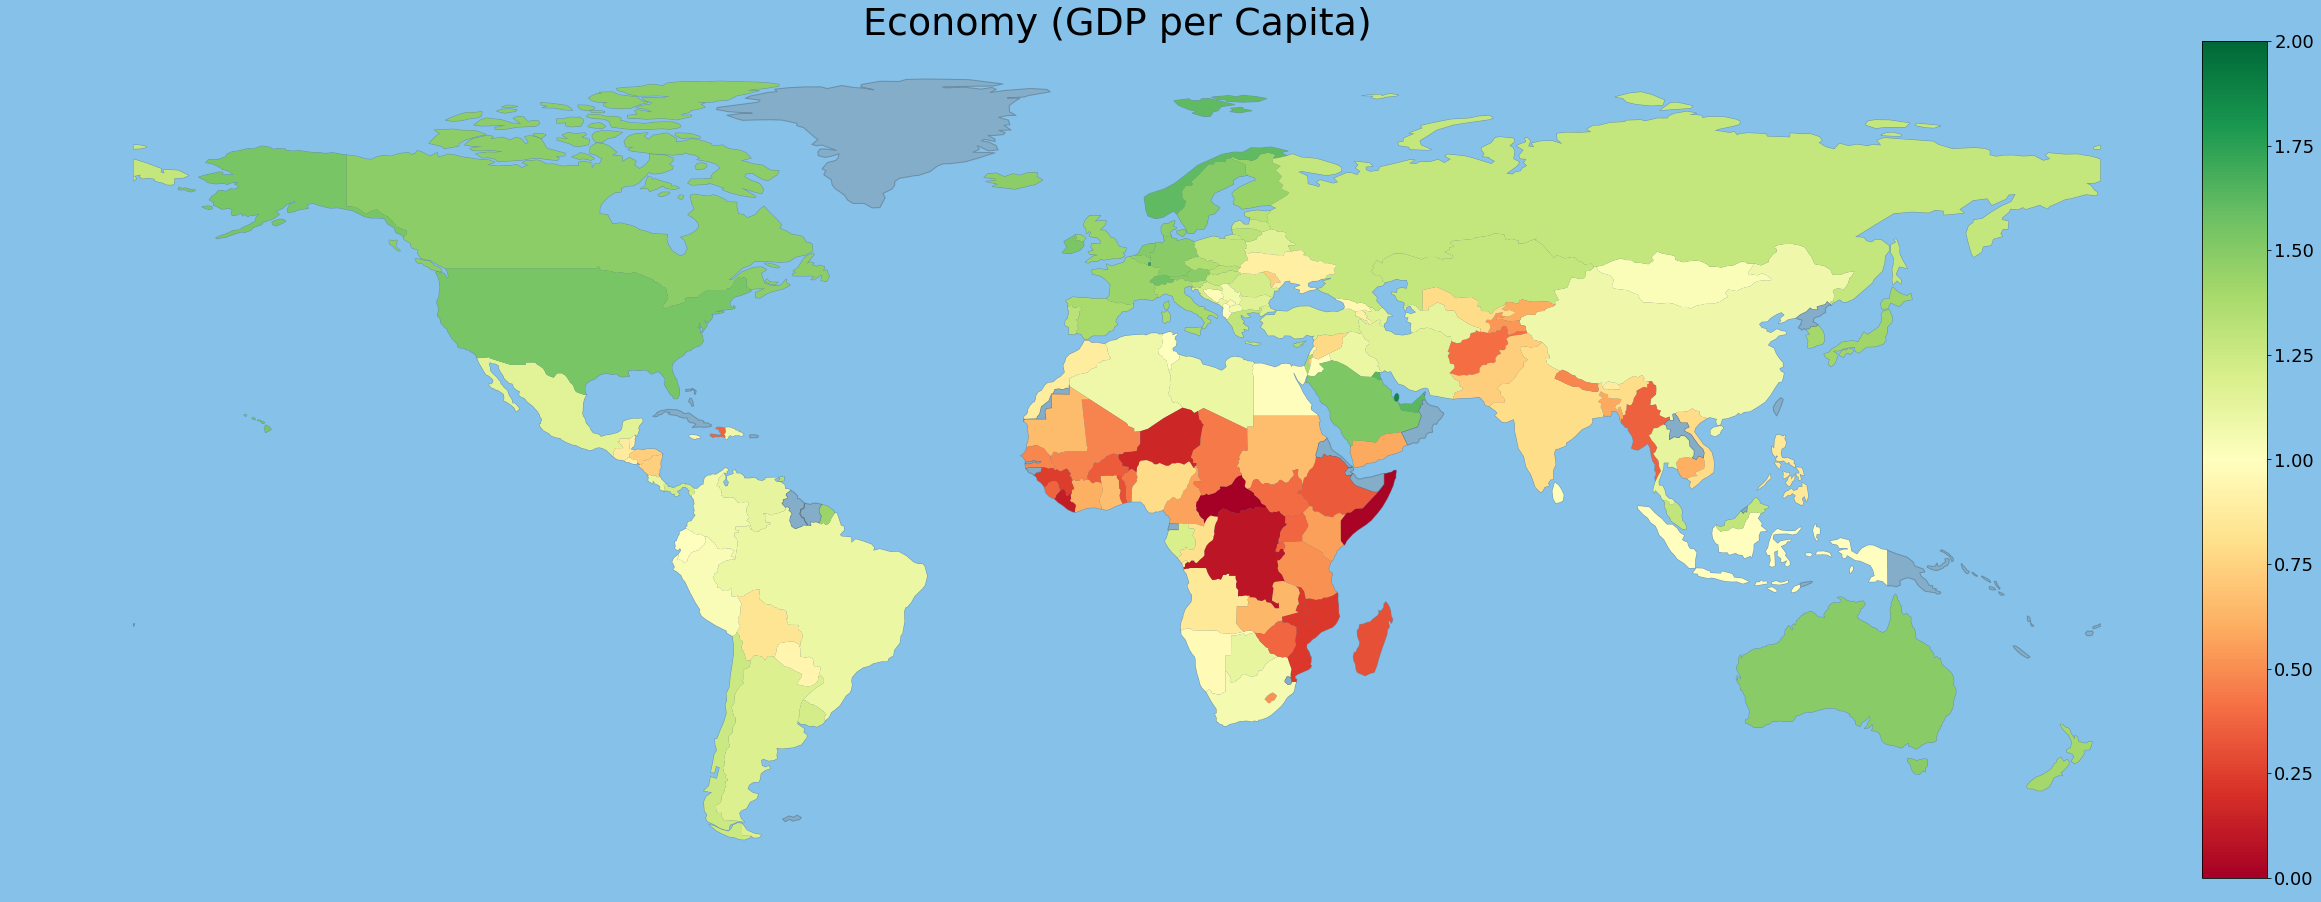

In [12]:
plot_map('Economy (GDP per Capita)', 0, 2)

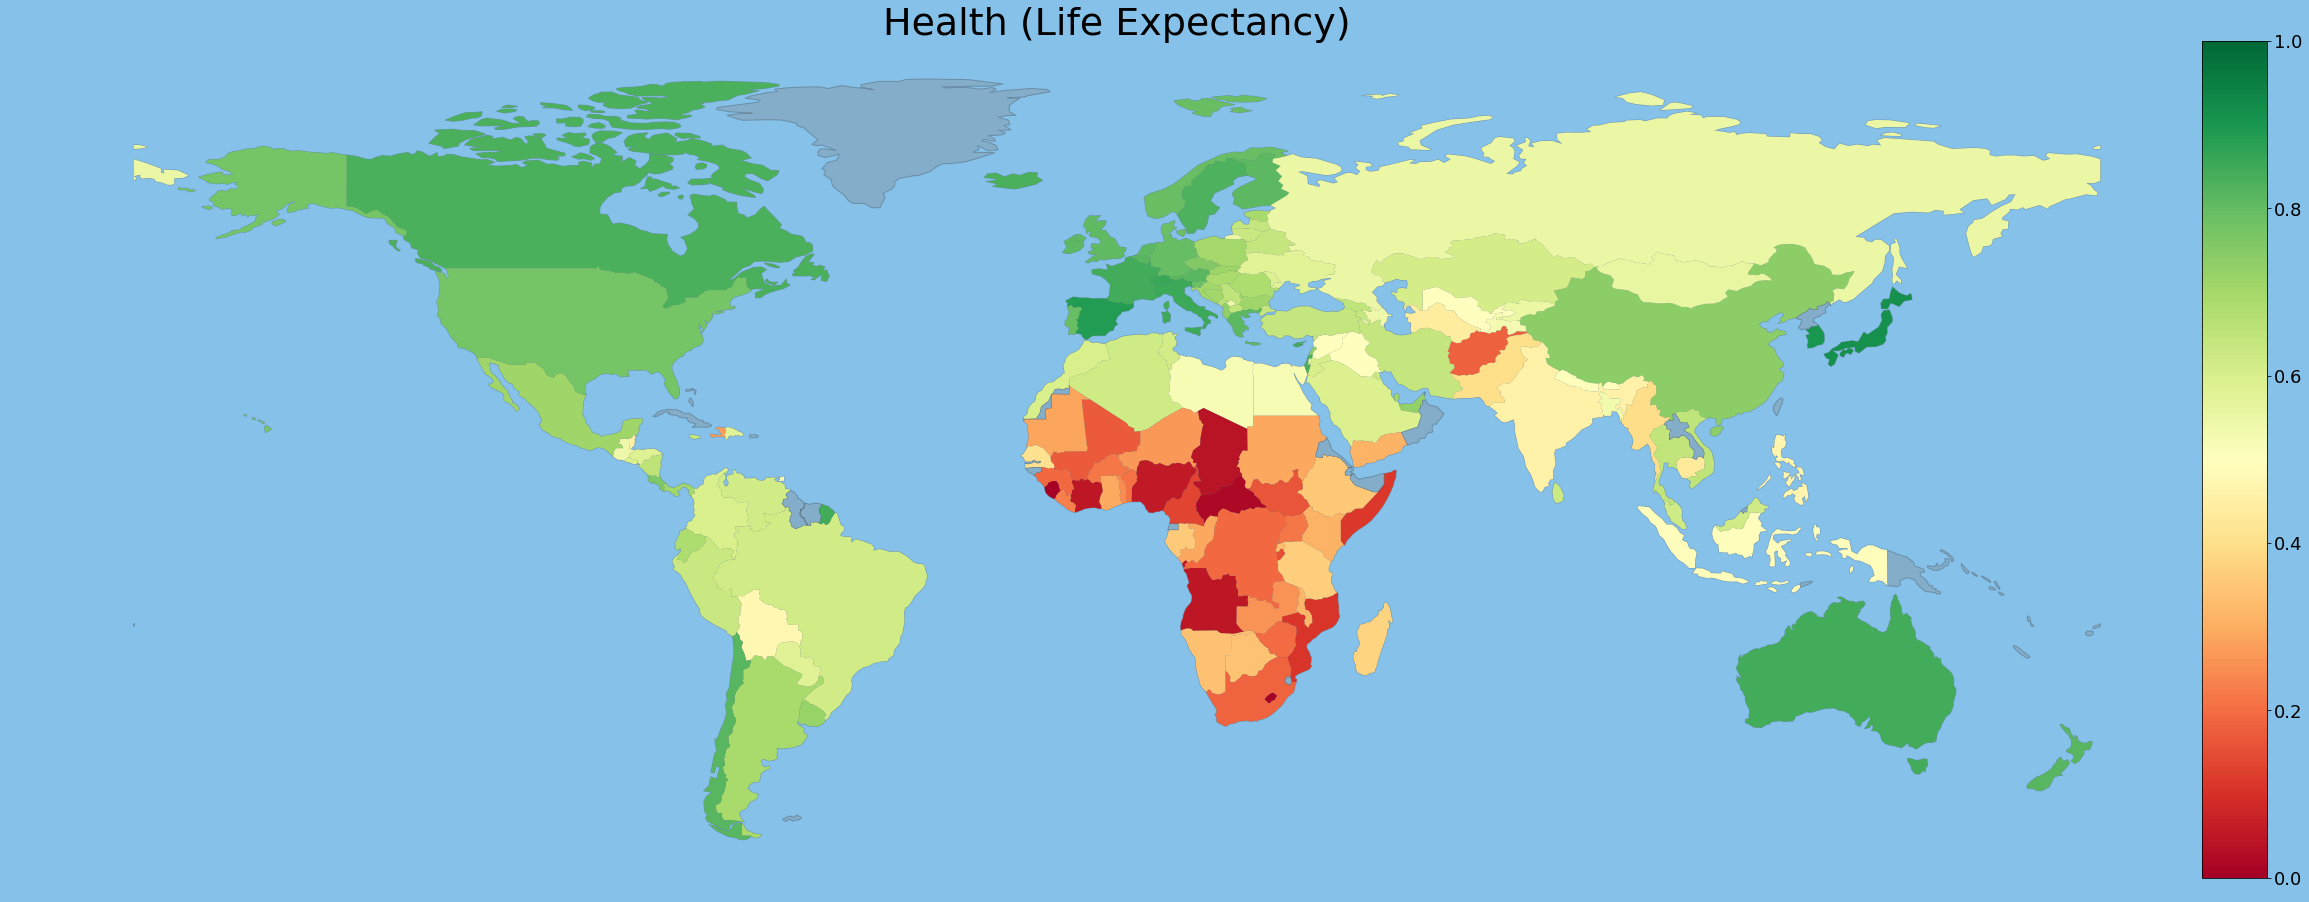

In [13]:
plot_map('Health (Life Expectancy)', 0, 1)

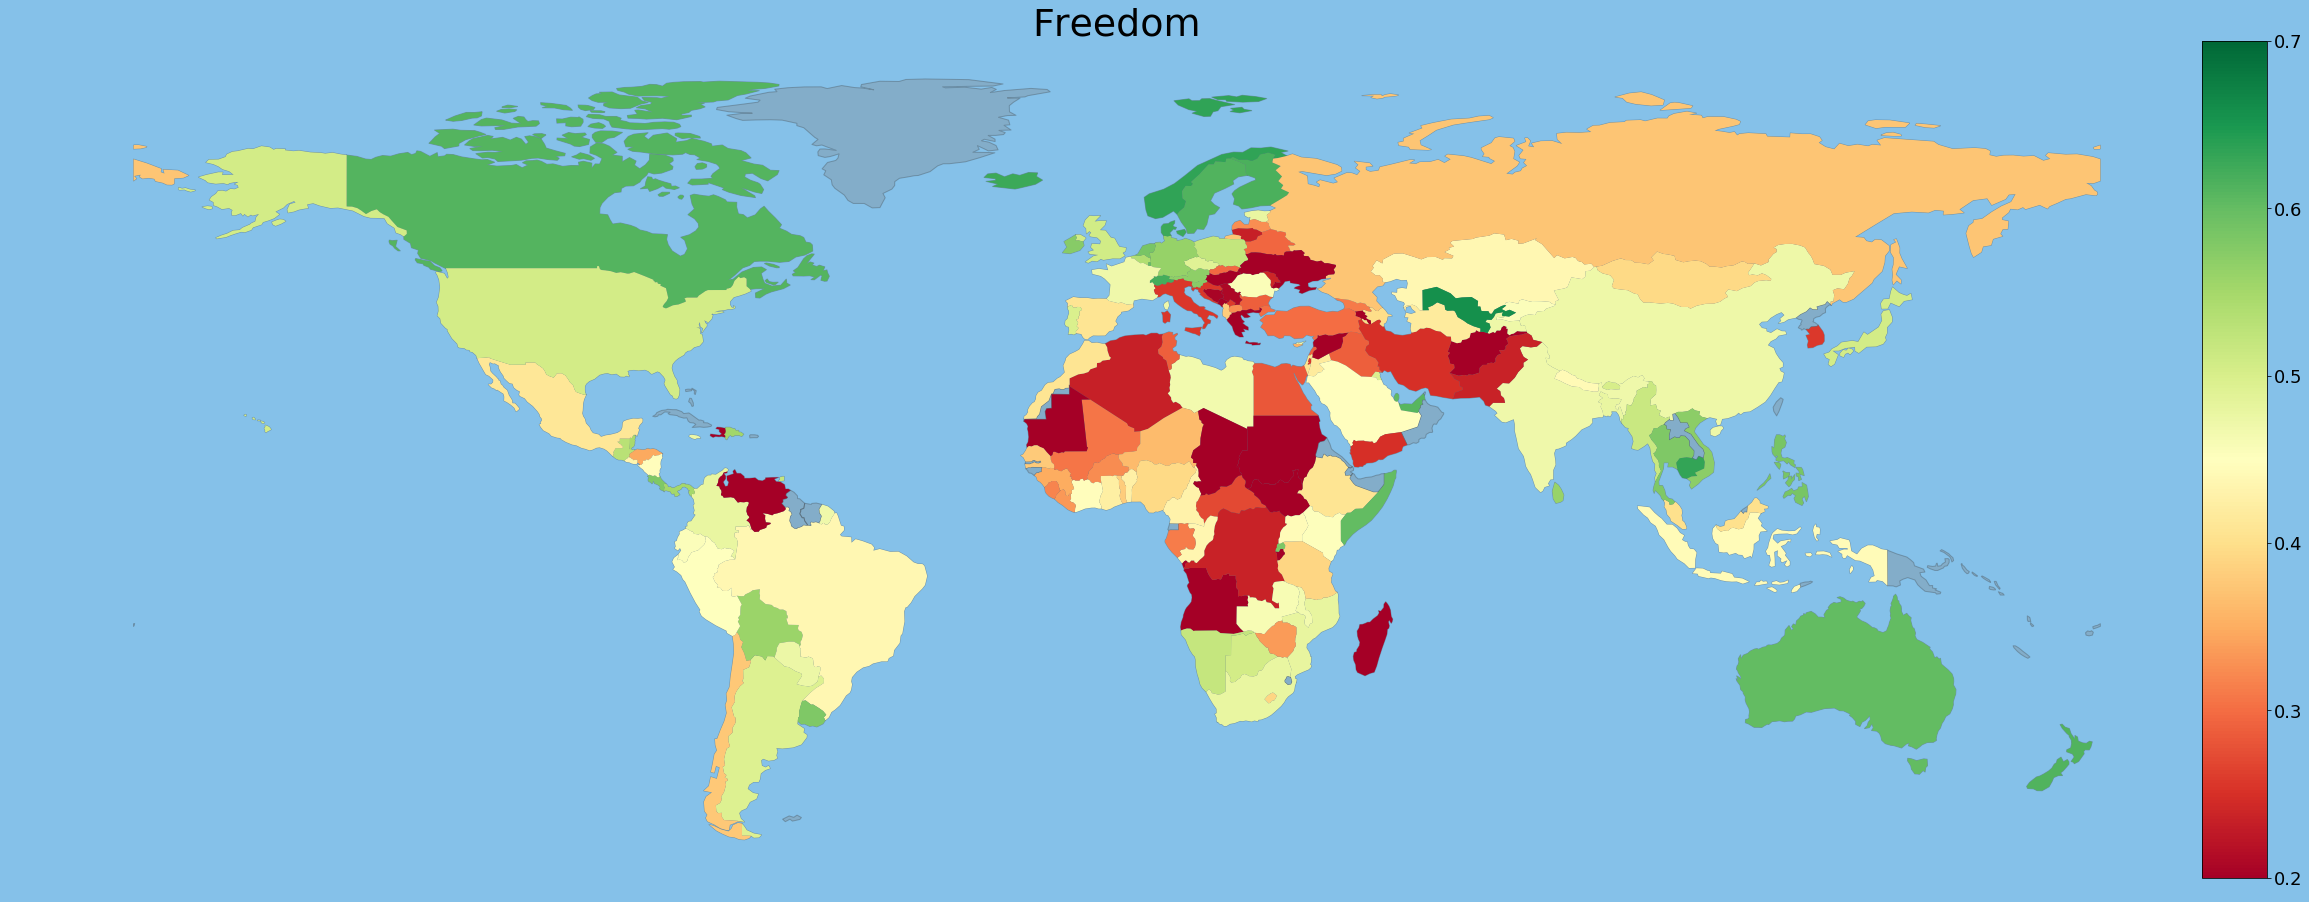

In [14]:
plot_map('Freedom', 0.2, 0.7)

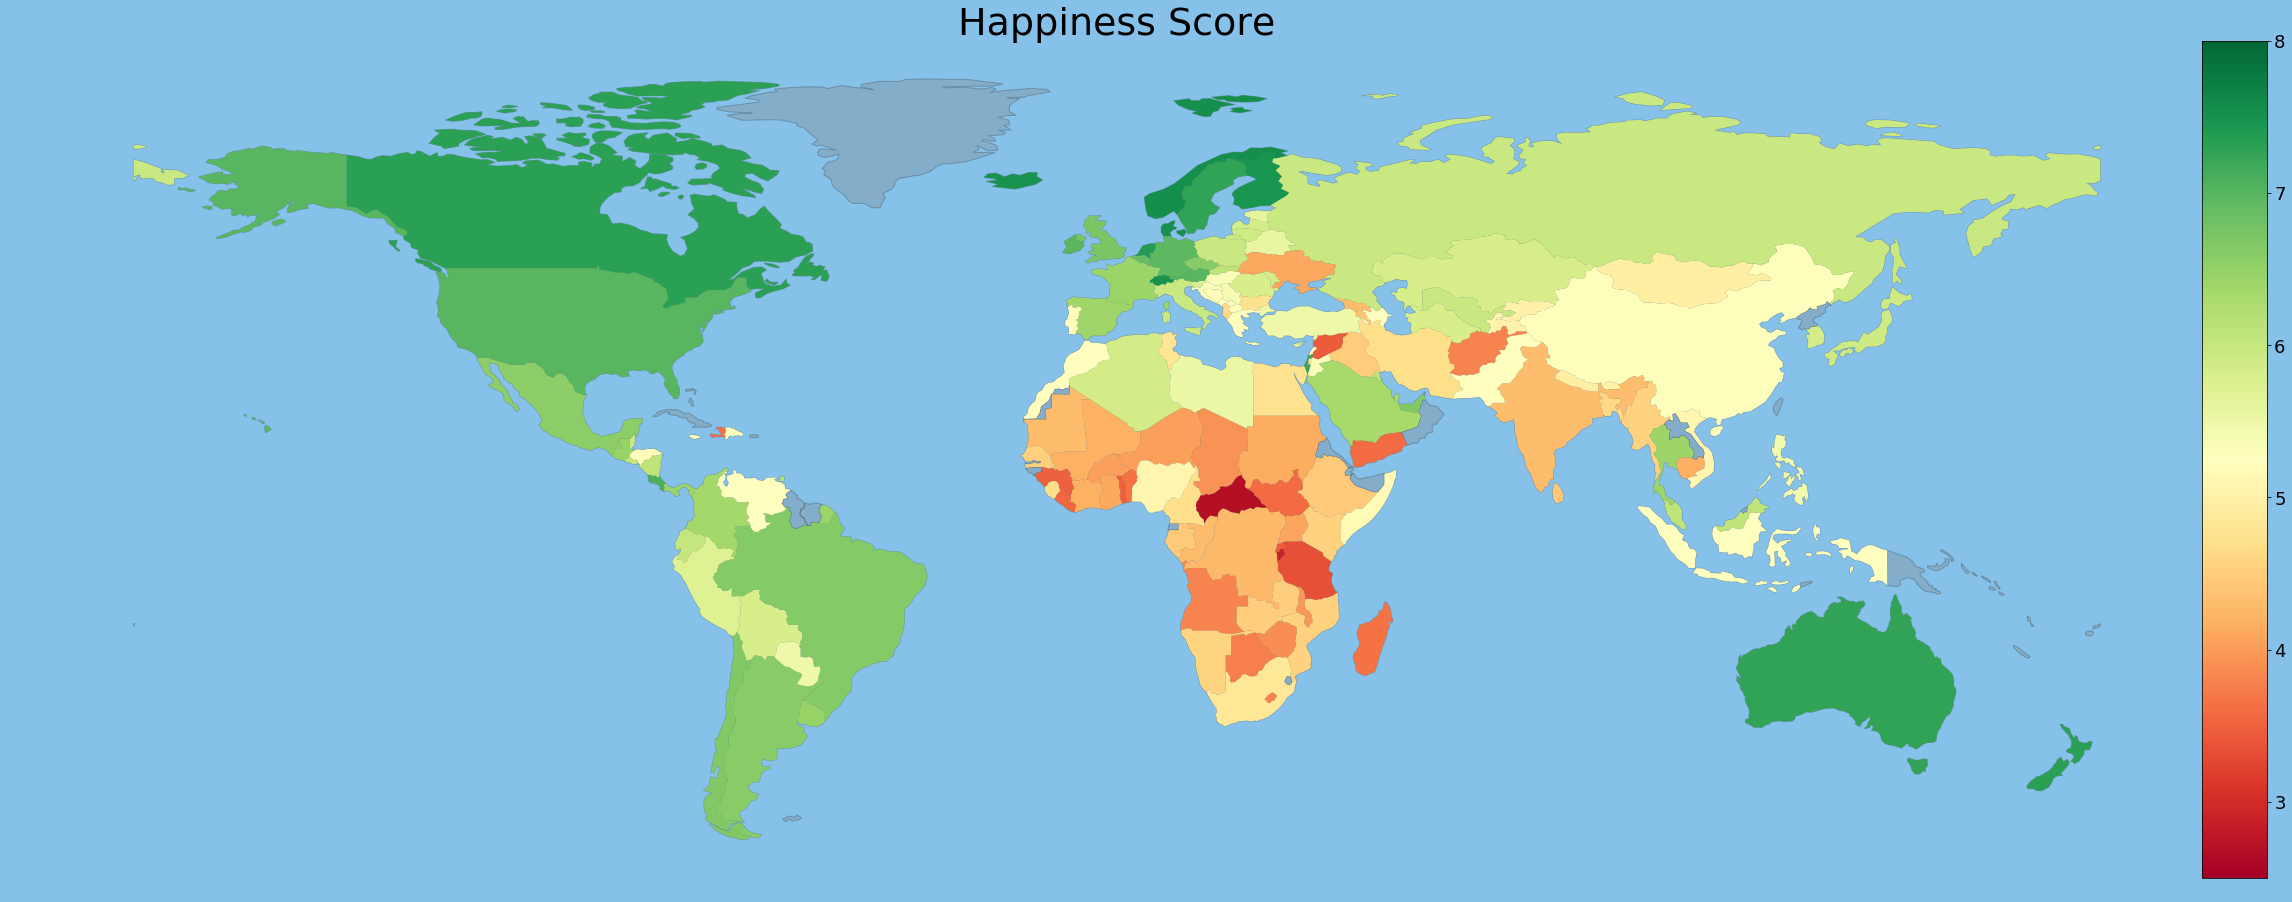

In [15]:
plot_map('Happiness Score', 2.5, 8)

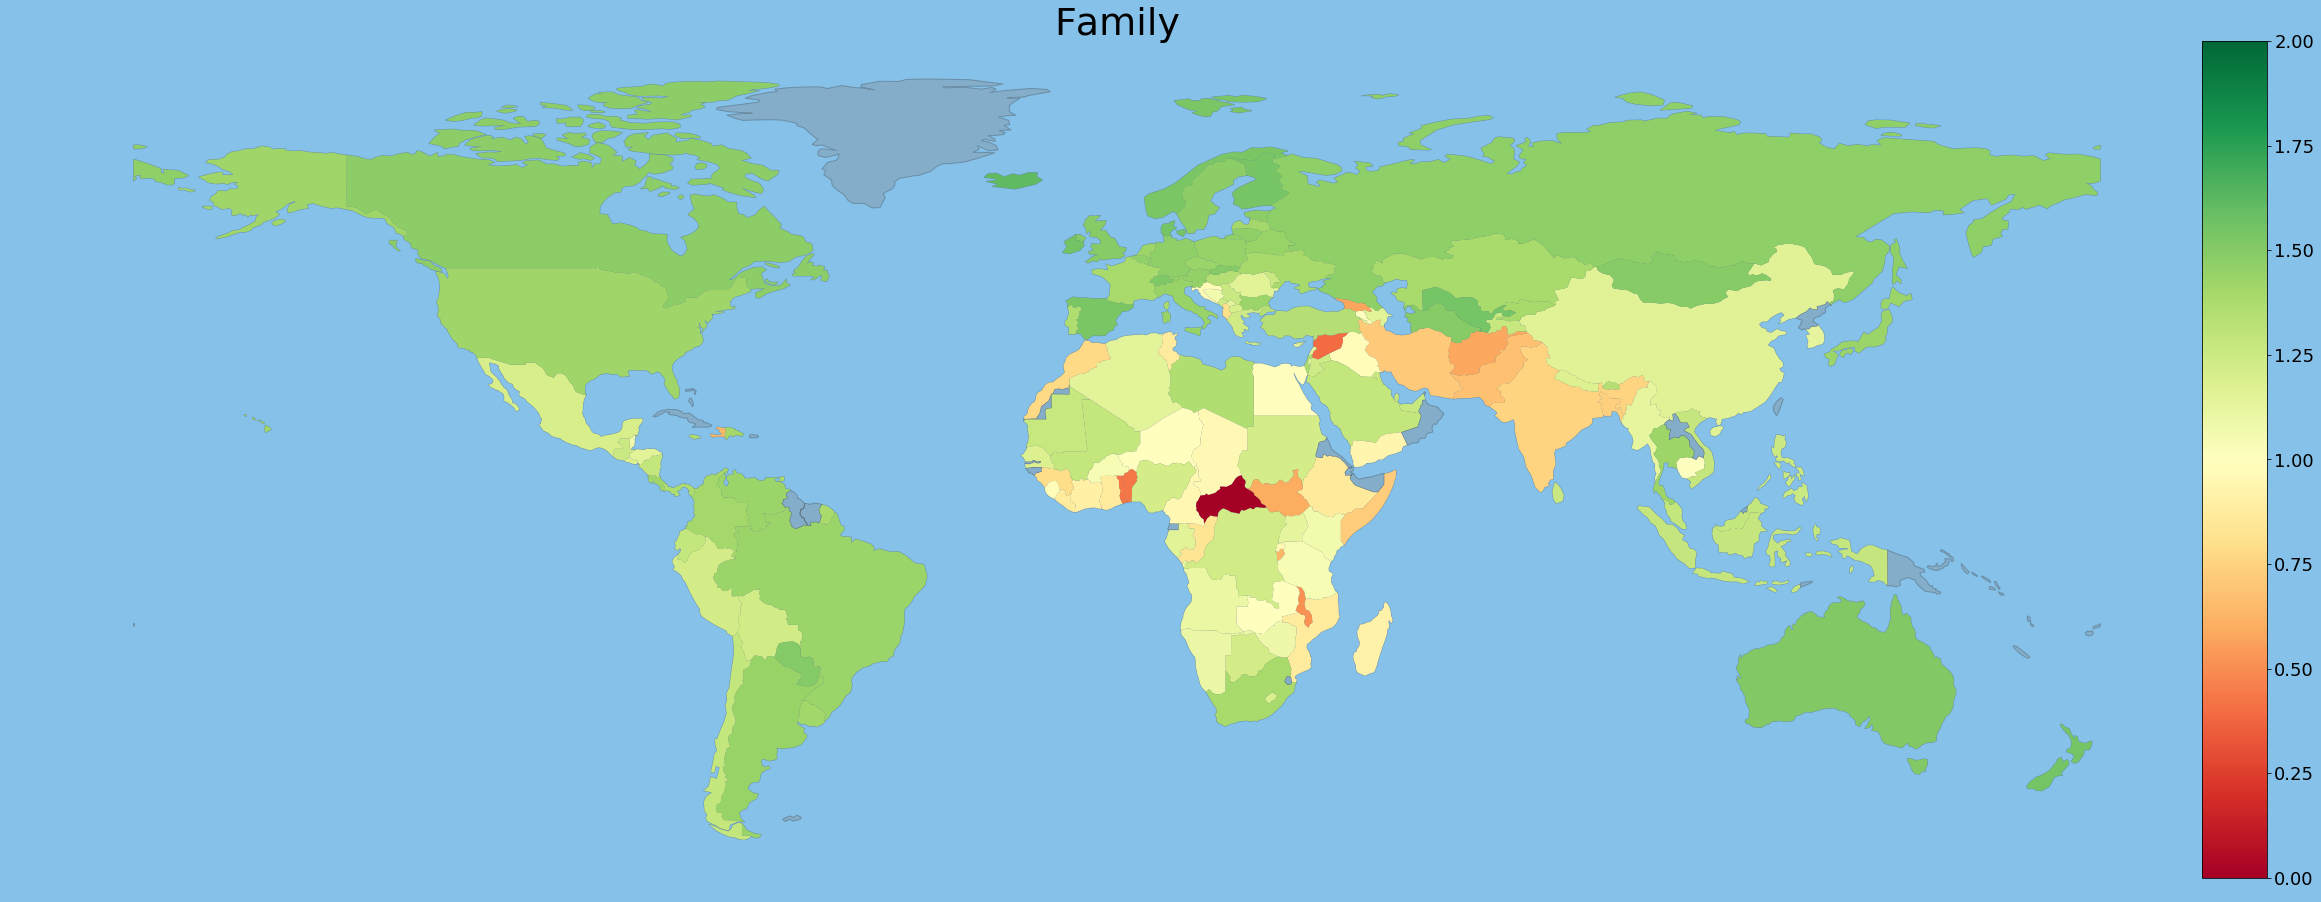

In [16]:
plot_map('Family', 0, 2)

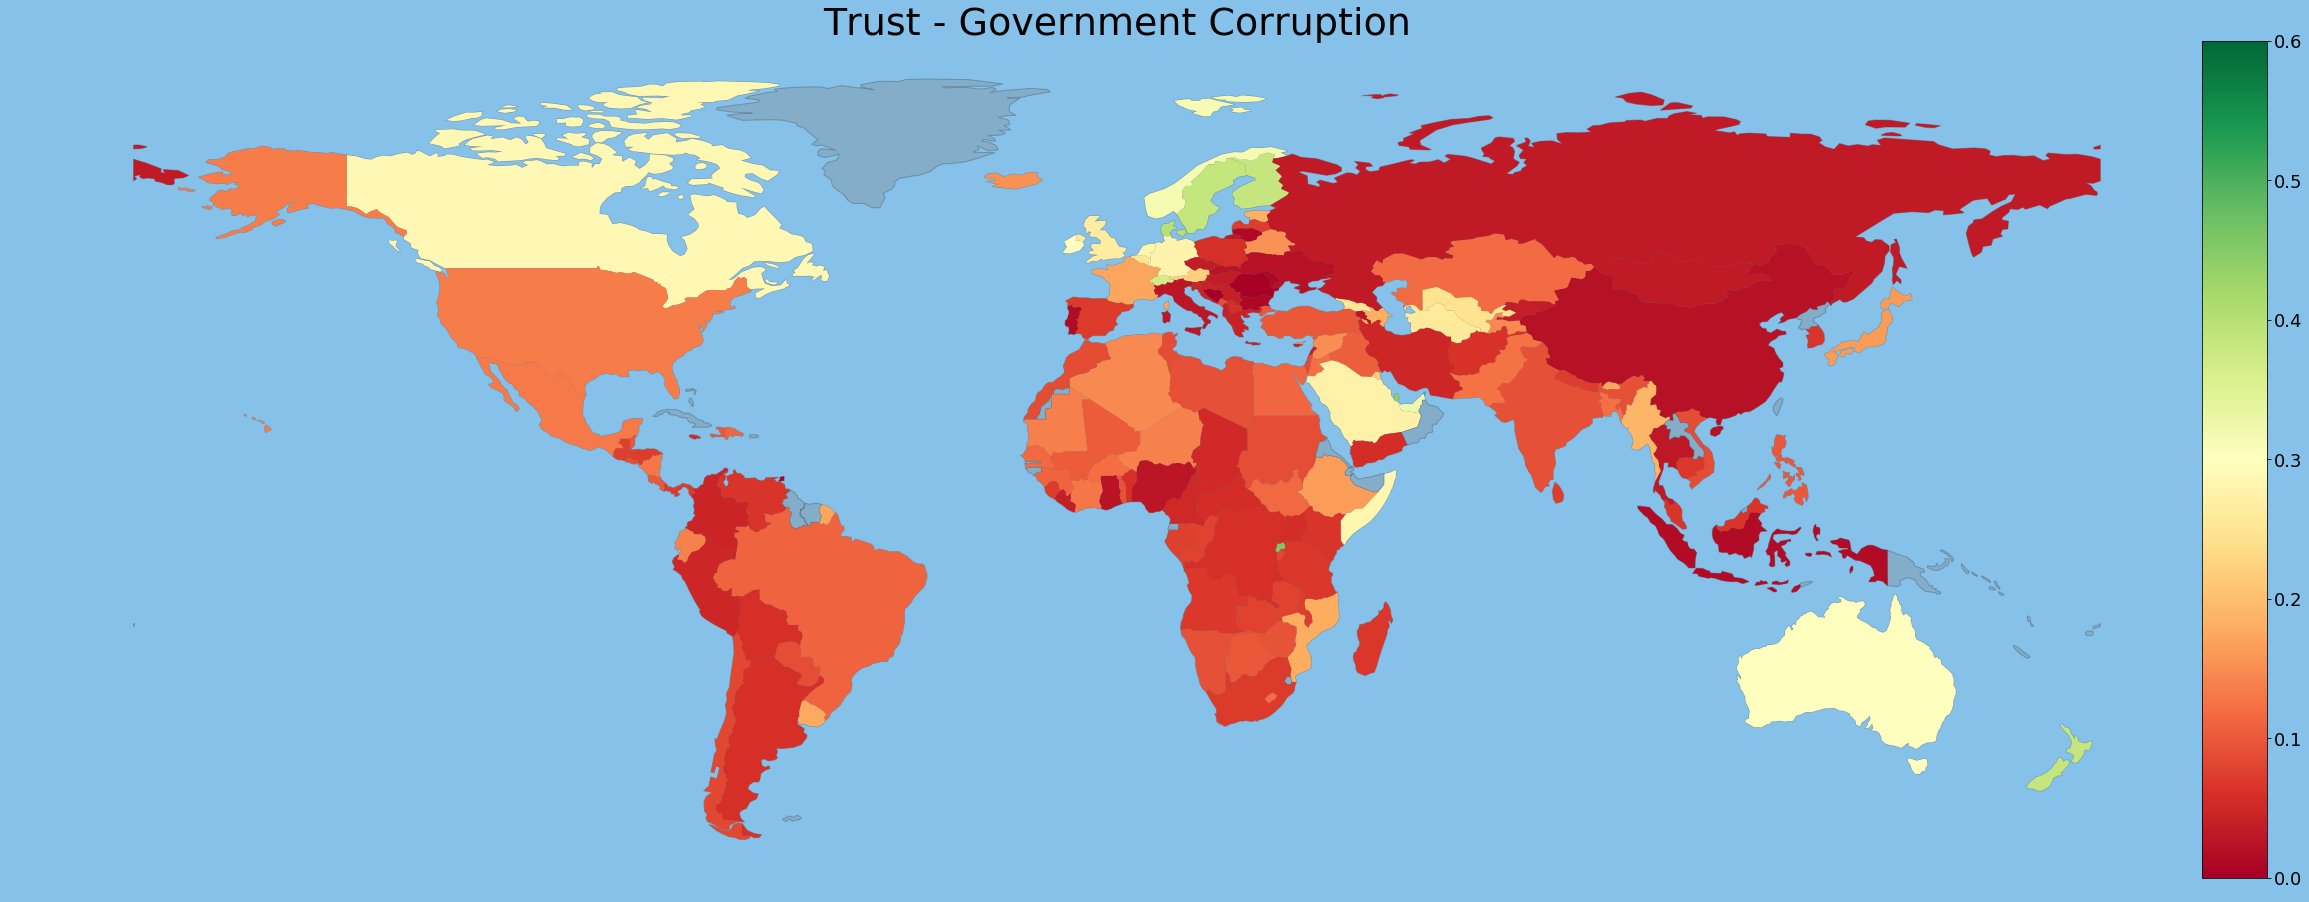

In [17]:
plot_map('Trust - Government Corruption', 0, 0.6)

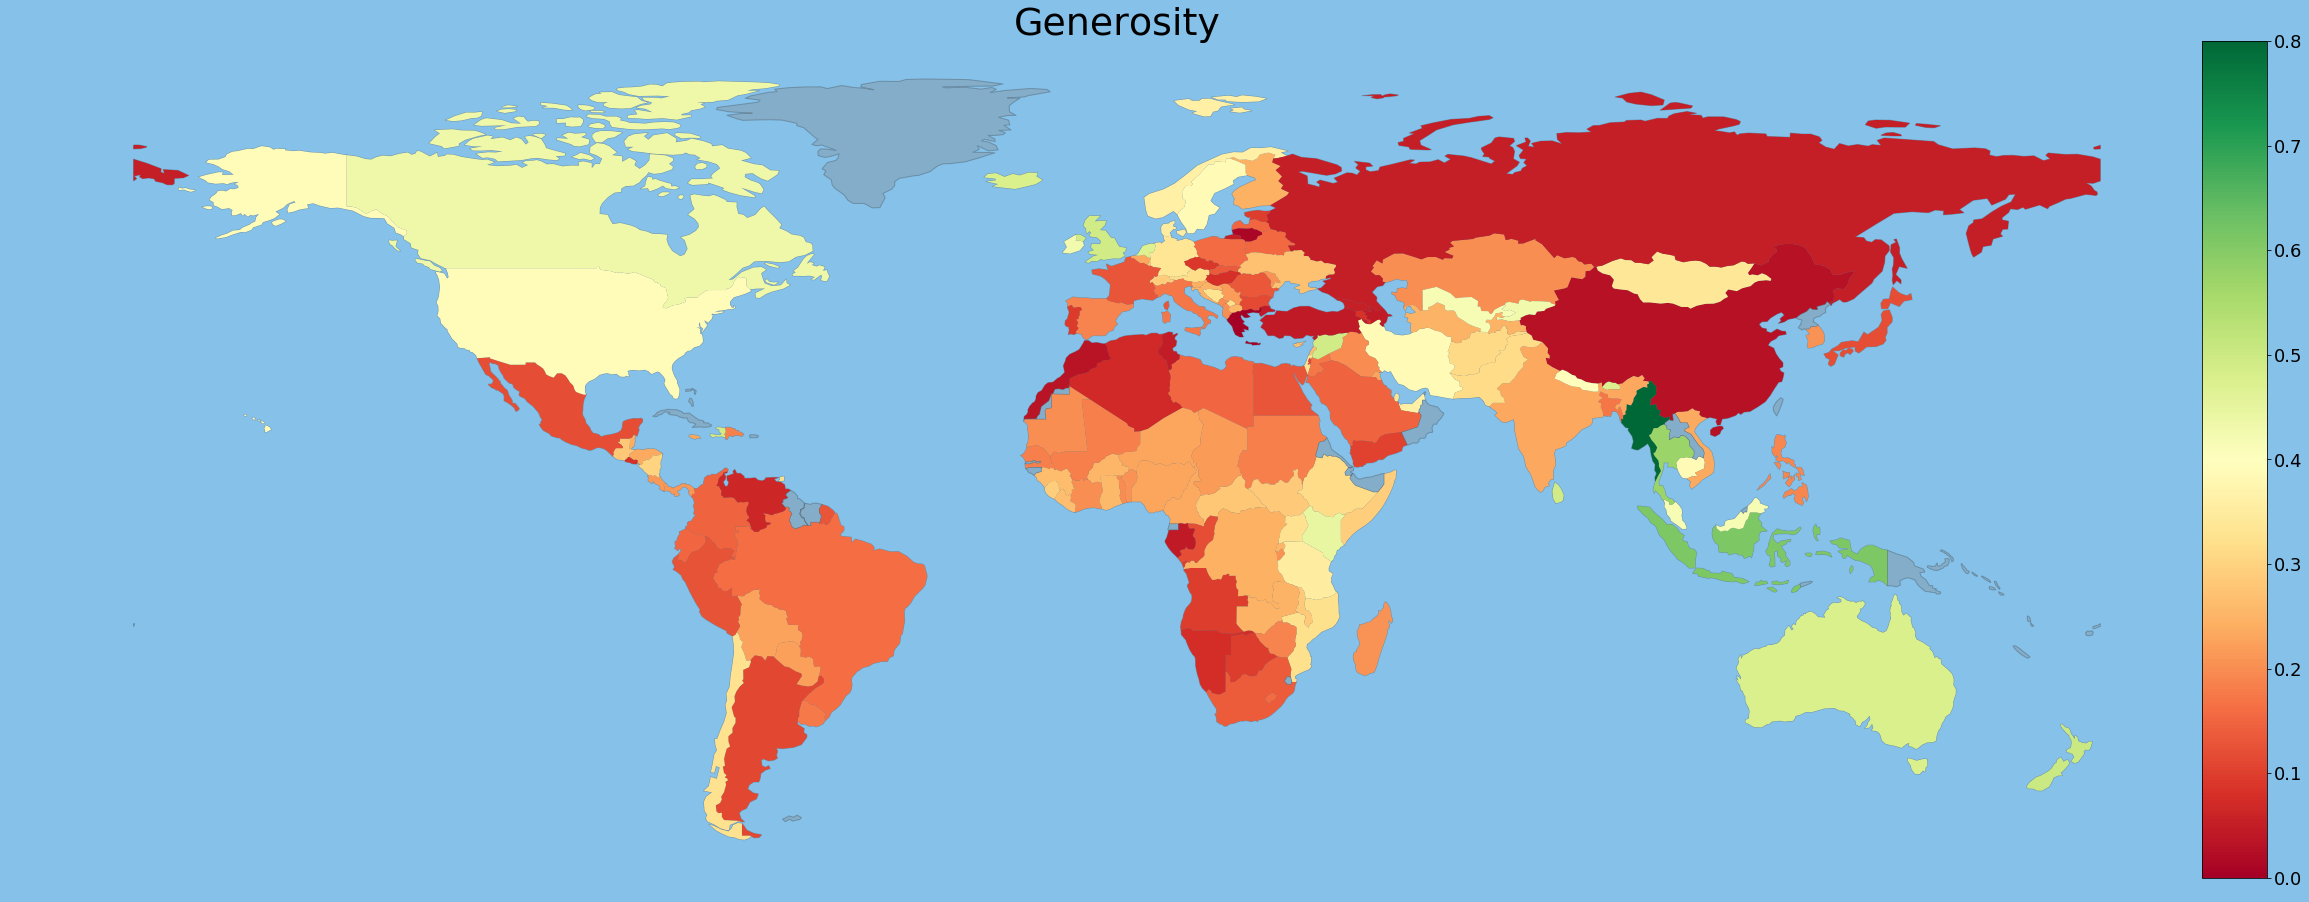

In [18]:
plot_map('Generosity', 0, 0.8)